In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


In [6]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 1684s 10us/step


In [7]:
X_test.shape

(10000, 32, 32, 3)

In [29]:
y_test.shape

(50000,)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test=y_train.reshape(-1,)


In [13]:
classes= ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse","ship","truck"]

In [16]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

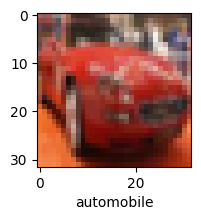

In [17]:
plot_sample(X_train, y_train, 5)

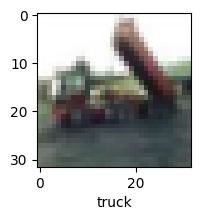

In [20]:
plot_sample(X_train,y_test,2)

In [21]:
X_train= X_train/255.0
X_test=X_test/255.0

In [27]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
    
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 253s 124ms/step - loss: 1.4728 - accuracy: 0.4703
Epoch 2/10
1563/1563 [==============================] - 90s 57ms/step - loss: 1.0976 - accuracy: 0.6147
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9698 - accuracy: 0.6641
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8895 - accuracy: 0.6914
Epoch 5/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.8300 - accuracy: 0.7133
Epoch 6/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7752 - accuracy: 0.7307
Epoch 7/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.7263 - accuracy: 0.7485
Epoch 8/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.6891 - accuracy: 0.7601
Epoch 9/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.6513 - accuracy: 0.7738
Epoch 10/10
1563/1563 [==============================] - 88s 5

In [28]:
cnn.evaluate(X_test, y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 10000
  y sizes: 50000
Make sure all arrays contain the same number of samples.

In [23]:
y_pred = cnn.predict(C)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 2663, in get
        return deserialize(identifier)
    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 2617, in deserialize
        return deserialize_keras_object(
    File "c:\Users\RAHUL BAYAS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\saving\legacy\serialization.py", line 557, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'sparse_categorial_crossentropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
